In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
import warnings
warnings.filterwarnings('ignore')

In [46]:
df = pd.read_csv(r'D:\New folder (6)\PJMW_MW_Hourly.csv', parse_dates=["Datetime"])
df.head()

,Datetime,PJMW_MW
0,2002-12-31 01:00:00,5077
1,2002-12-31 02:00:00,4939
2,2002-12-31 03:00:00,4885
3,2002-12-31 04:00:00,4857
4,2002-12-31 05:00:00,4930


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143206 entries, 0 to 143205
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Datetime  143206 non-null  datetime64[ns]
 1   PJMW_MW   143206 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.2 MB


# EDA

In [48]:
# Convert 'Datetime' to datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [49]:
# Extract time-based features
df['Hour'] = df['Datetime'].dt.hour
df['Day'] = df['Datetime'].dt.day
df['Weekday'] = df['Datetime'].dt.weekday
df['Month'] = df['Datetime'].dt.month
df['Year'] = df['Datetime'].dt.year
df['Is_Weekend'] = df['Weekday'].isin([5, 6])

In [50]:
df

,Datetime,PJMW_MW,Hour,Day,Weekday,Month,Year,Is_Weekend
0,2002-12-31 01:00:00,5077,1,31,1,12,2002,False
1,2002-12-31 02:00:00,4939,2,31,1,12,2002,False
2,2002-12-31 03:00:00,4885,3,31,1,12,2002,False
3,2002-12-31 04:00:00,4857,4,31,1,12,2002,False
4,2002-12-31 05:00:00,4930,5,31,1,12,2002,False
...,...,...,...,...,...,...,...,...
143201,2018-01-01 20:00:00,8401,20,1,0,1,2018,False
143202,2018-01-01 21:00:00,8373,21,1,0,1,2018,False
143203,2018-01-01 22:00:00,8238,22,1,0,1,2018,False
143204,2018-01-01 23:00:00,7958,23,1,0,1,2018,False


In [51]:
df.describe()

,Datetime,PJMW_MW,Hour,Day,Weekday,Month,Year
count,143206,143206.000000,143206.000000,143206.000000,143206.000000,143206.000000,143206.000000
mean,2010-06-02 03:39:50.656816128,5602.375089,11.501620,15.726024,2.998492,6.502835,2009.918691
min,2002-04-01 01:00:00,487.000000,0.000000,1.000000,0.000000,1.000000,2002.000000
25%,2006-05-02 03:15:00,4907.000000,6.000000,8.000000,1.000000,4.000000,2006.000000
50%,2010-06-02 04:30:00,5530.000000,12.000000,16.000000,3.000000,6.000000,2010.000000
75%,2014-07-03 06:45:00,6252.000000,18.000000,23.000000,5.000000,9.000000,2014.000000
max,2018-08-03 00:00:00,9594.000000,23.000000,31.000000,6.000000,12.000000,2018.000000
std,NaN,979.142872,6.921789,8.802522,1.999696,3.419536,4.730344


In [52]:
# Check for missing values
df.isnull().sum()

Datetime      0
PJMW_MW       0
Hour          0
Day           0
Weekday       0
Month         0
Year          0
Is_Weekend    0
dtype: int64

#### There are no missing values present in the dataset

In [53]:
# Set plot style
sns.set(style="whitegrid", palette="viridis")
plt.figure(figsize=(16, 10))

<Figure size 1600x1000 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

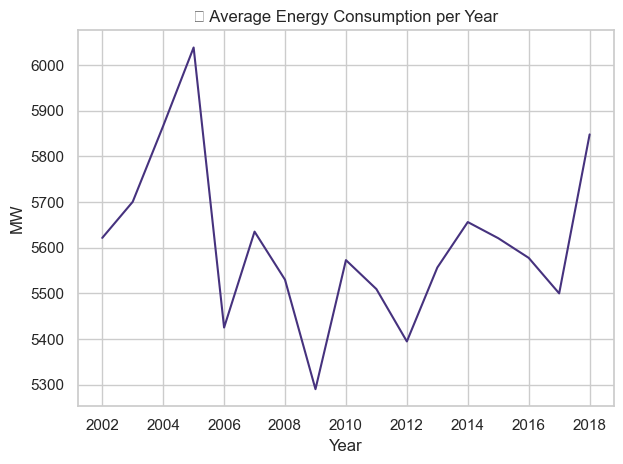

In [54]:
# 1. Overall Trend (Yearly)
yearly_avg = df.groupby('Year')['PJMW_MW'].mean()
sns.lineplot(x=yearly_avg.index, y=yearly_avg.values)
plt.title('🔌 Average Energy Consumption per Year')
plt.xlabel('Year')
plt.ylabel('MW')
plt.tight_layout()
plt.show()

Gradual increase in energy demand until around 2011–2012

After that, it stabilizes or slightly declines, possibly due to efficiency improvements or other regional shifts

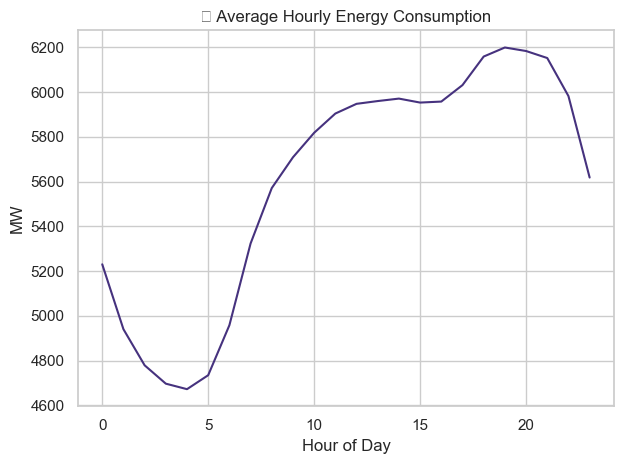

In [55]:
# 2. Hourly Pattern
hourly_avg = df.groupby('Hour')['PJMW_MW'].mean()
sns.lineplot(x=hourly_avg.index, y=hourly_avg.values)
plt.title('🕐 Average Hourly Energy Consumption')
plt.xlabel('Hour of Day')
plt.ylabel('MW')
plt.tight_layout()
plt.show()

Peaks around 6–7 PM (evening usage surge)

Lowest between 2–5 AM, when most people are asleep

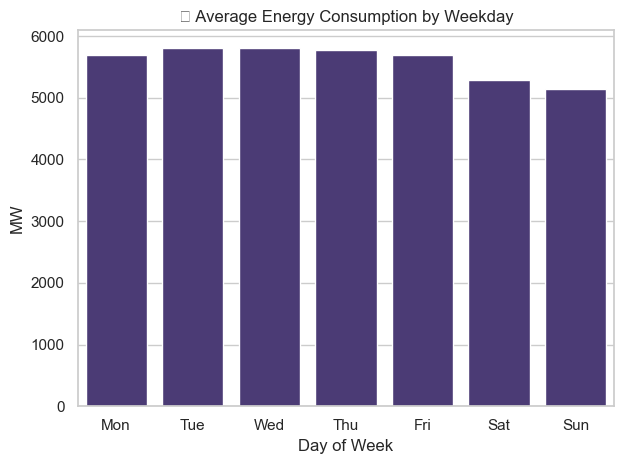

In [56]:
# 3. Weekly Pattern
weekday_avg = df.groupby('Weekday')['PJMW_MW'].mean()
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sns.barplot(x=days, y=weekday_avg.values)
plt.title('📅 Average Energy Consumption by Weekday')
plt.xlabel('Day of Week')
plt.ylabel('MW')
plt.tight_layout()
plt.show()

Weekdays (Mon–Fri) have slightly higher usage

Weekends (Sat–Sun) show a small dip, typical for industrial/commercial demand

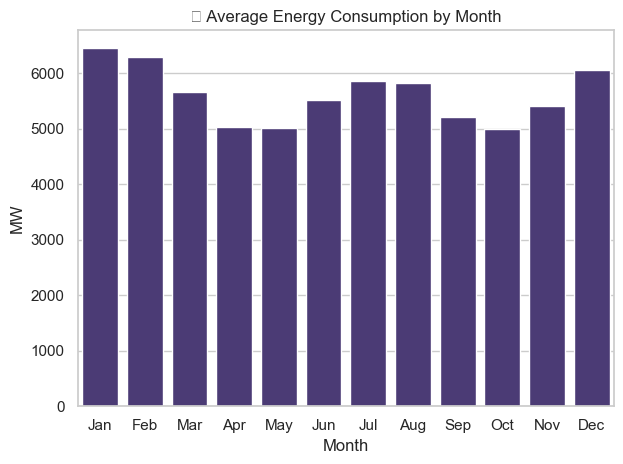

In [57]:
# 4. Monthly/Seasonal Pattern
monthly_avg = df.groupby('Month')['PJMW_MW'].mean()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.barplot(x=months, y=monthly_avg.values)
plt.title('📆 Average Energy Consumption by Month')
plt.xlabel('Month')
plt.ylabel('MW')

plt.tight_layout()
plt.show()

Highest consumption in July–August (AC use in summer)

Second peak in January (heating)

Dips in April and October, moderate weather months with less HVAC demand

# Feature Engineering + Model Preparation

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
df = df.sort_values("Datetime")

# Drop duplicates
df = df.drop_duplicates(subset='Datetime', keep='first')

# Continue as planned
df.set_index("Datetime", inplace=True)
df = df.asfreq("H")  # Now this will work
df["PJMW_MW"] = df["PJMW_MW"].fillna(method="ffill")

In [60]:
# Create lag and rolling features
df["Lag_1H"] = df["PJMW_MW"].shift(1)
df["Lag_24H"] = df["PJMW_MW"].shift(24)
df["Rolling_24H"] = df["PJMW_MW"].rolling(24).mean()
df["Rolling_7D"] = df["PJMW_MW"].rolling(168).mean()

# Drop rows with NaNs due to shifting/rolling
df = df.dropna().copy()

In [61]:
df

,PJMW_MW,Hour,Day,Weekday,Month,Year,Is_Weekend,Lag_1H,Lag_24H,Rolling_24H,Rolling_7D
Datetime,,,,,,,,,,,
2002-04-08 00:00:00,4798.0,0.0,8.0,0.0,4.0,2002.0,False,5171.0,5116.0,5038.958333,5380.672619
2002-04-08 01:00:00,4634.0,1.0,8.0,0.0,4.0,2002.0,False,4798.0,5002.0,5023.625000,5382.220238
2002-04-08 02:00:00,4532.0,2.0,8.0,0.0,4.0,2002.0,False,4634.0,4858.0,5010.041667,5383.565476
2002-04-08 03:00:00,4481.0,3.0,8.0,0.0,4.0,2002.0,False,4532.0,4858.0,4994.333333,5384.511905
2002-04-08 04:00:00,4527.0,4.0,8.0,0.0,4.0,2002.0,False,4481.0,4871.0,4980.000000,5385.511905
...,...,...,...,...,...,...,...,...,...,...,...
2018-08-02 20:00:00,6545.0,20.0,2.0,3.0,8.0,2018.0,False,6693.0,6816.0,5809.250000,5677.011905
2018-08-02 21:00:00,6496.0,21.0,2.0,3.0,8.0,2018.0,False,6545.0,6571.0,5806.125000,5673.636905
2018-08-02 22:00:00,6325.0,22.0,2.0,3.0,8.0,2018.0,False,6496.0,6362.0,5804.583333,5670.244048


In [62]:
from pandas.tseries.offsets import DateOffset

# Split into train and test
cutoff_date = df.index.max() - DateOffset(years=2)

train_df = df[df.index < cutoff_date]
test_df = df[df.index >= cutoff_date]

# Define features and target
features = ['Lag_1H', 'Lag_24H', 'Rolling_24H', 'Rolling_7D']
target = 'PJMW_MW'

X_train = train_df[features]
y_train = train_df[target]

X_test = test_df[features]
y_test = test_df[target]

In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Linear Regression

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
lr_pred = lr_model.predict(X_test)

# Evaluate
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))

print(f" Linear Regression - MAE: {lr_mae:.2f}, RMSE: {lr_rmse:.2f}")

 Linear Regression - MAE: 156.32, RMSE: 198.59


# 2. XGBoost

In [65]:
from xgboost import XGBRegressor

# Train XGBoost
xgb_model = XGBRegressor(n_estimators=100)
xgb_model.fit(X_train, y_train)

# Predict
xgb_pred = xgb_model.predict(X_test)

# Evaluate
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))

print(f" XGBoost - MAE: {xgb_mae:.2f}, RMSE: {xgb_rmse:.2f}")

 XGBoost - MAE: 150.24, RMSE: 194.41


# 3. Moving Average

In [66]:
# 7-day moving average shifted by 1 (to prevent leakage)
ma_pred = df['PJMW_MW'].rolling(168).mean().shift(1).loc[test_df.index]

# Evaluate
ma_mae = mean_absolute_error(y_test, ma_pred)
ma_rmse = np.sqrt(mean_squared_error(y_test, ma_pred))

print(f" Moving Average - MAE: {ma_mae:.2f}, RMSE: {ma_rmse:.2f}")

 Moving Average - MAE: 656.84, RMSE: 820.29


# 4. Simple Exponential Smoothing

In [67]:
from statsmodels.tsa.api import SimpleExpSmoothing

ses_model = SimpleExpSmoothing(train_df['PJMW_MW']).fit()
ses_pred = ses_model.forecast(len(test_df))

ses_mae = mean_absolute_error(y_test, ses_pred)
ses_rmse = np.sqrt(mean_squared_error(y_test, ses_pred))

print(f" SES - MAE: {ses_mae:.2f}, RMSE: {ses_rmse:.2f}")

 SES - MAE: 1086.38, RMSE: 1277.65


# 5. Holt’s Linear Trend

In [68]:
from statsmodels.tsa.api import Holt

holt_model = Holt(train_df['PJMW_MW']).fit()
holt_pred = holt_model.forecast(len(test_df))

# Evaluate
holt_mae = mean_absolute_error(y_test, holt_pred)
holt_rmse = np.sqrt(mean_squared_error(y_test, holt_pred))

print(f" Holt’s Linear Trend - MAE: {holt_mae:.2f}, RMSE: {holt_rmse:.2f}")

 Holt’s Linear Trend - MAE: 4090111.41, RMSE: 4723060.33


# 6. Holt Winters

In [69]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

hw_model = ExponentialSmoothing(
    train_df['PJMW_MW'],
    seasonal='add',
    seasonal_periods=24  # daily cycle
).fit()

hw_pred = hw_model.forecast(len(test_df))

# Evaluate
hw_mae = mean_absolute_error(y_test, hw_pred)
hw_rmse = np.sqrt(mean_squared_error(y_test, hw_pred))

print(f" Holt-Winters - MAE: {hw_mae:.2f}, RMSE: {hw_rmse:.2f}")

 Holt-Winters - MAE: 1034.86, RMSE: 1255.26


# 7. ARIMA

In [70]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(train_df['PJMW_MW'], order=(2,1,2))  # (p,d,q)
arima_fit = arima_model.fit()
arima_pred = arima_fit.forecast(steps=len(test_df))

# Evaluate
arima_mae = mean_absolute_error(y_test, arima_pred)
arima_rmse = np.sqrt(mean_squared_error(y_test, arima_pred))

print(f" ARIMA(2,1,2) - MAE: {arima_mae:.2f}, RMSE: {arima_rmse:.2f}")


 ARIMA(2,1,2) - MAE: 1000.00, RMSE: 1185.33


# 8. SARIMAX

In [71]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Train SARIMA on hourly data
sarima_model = SARIMAX(train_df['PJMW_MW'], order=(1,1,1), seasonal_order=(1,1,1,24)).fit(low_memory=True)

# Predict same number of hourly steps
sarima_pred = sarima_model.forecast(steps=len(test_df))

# Now this will work
sarima_mae = mean_absolute_error(test_df['PJMW_MW'], sarima_pred)
sarima_rmse = np.sqrt(mean_squared_error(test_df['PJMW_MW'], sarima_pred))


In [72]:
print(f" SARIMA - MAE: {sarima_mae:.2f}, RMSE: {sarima_rmse:.2f}")

 SARIMA - MAE: 14650.11, RMSE: 16673.55


# 9. LSTM 

In [73]:
from sklearn.preprocessing import MinMaxScaler

# Step 1: Scale the Data

# Select only target variable for LSTM
scaler_lstm = MinMaxScaler()
pjmw_scaled = scaler_lstm.fit_transform(df[['PJMW_MW']])

# Add back to df
df_lstm = df.copy()
df_lstm['Scaled'] = pjmw_scaled

In [75]:
# Step 2: Create Sequences (input: 24 hrs, output: next hour)

def create_sequences(data, n_input=24):
    X, y = [], []
    for i in range(len(data) - n_input):
        X.append(data[i:i+n_input])
        y.append(data[i+n_input])
    return np.array(X), np.array(y)

# Create input sequences
X_all, y_all = create_sequences(df_lstm['Scaled'].values, 24)

# Train-test split (last 2 years = test)
cutoff_index = len(df_lstm[df_lstm.index < cutoff_date]) - 24
X_train_dl, y_train_dl = X_all[:cutoff_index], y_all[:cutoff_index]
X_test_dl, y_test_dl = X_all[cutoff_index:], y_all[cutoff_index:]

In [76]:
# Step 3: LSTM Model
from keras.models import Sequential
from keras.layers import LSTM, Dense

lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(24, 1)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

# Train the model
lstm_model.fit(X_train_dl, y_train_dl, epochs=10, batch_size=32, verbose=1)


Epoch 1/10
3922/3922 [==============================] - 16s 4ms/step - loss: 0.0014
Epoch 2/10
3922/3922 [==============================] - 14s 4ms/step - loss: 2.2565e-04
Epoch 3/10
3922/3922 [==============================] - 14s 4ms/step - loss: 1.6977e-04
Epoch 4/10
3922/3922 [==============================] - 15s 4ms/step - loss: 1.4908e-04
Epoch 5/10
3922/3922 [==============================] - 14s 4ms/step - loss: 1.2734e-04
Epoch 6/10
3922/3922 [==============================] - 16s 4ms/step - loss: 1.1265e-04
Epoch 7/10
3922/3922 [==============================] - 18s 4ms/step - loss: 1.0614e-04
Epoch 8/10
3922/3922 [==============================] - 17s 4ms/step - loss: 1.0002e-04
Epoch 9/10
3922/3922 [==============================] - 16s 4ms/step - loss: 9.7488e-05
Epoch 10/10
3922/3922 [==============================] - 16s 4ms/step - loss: 9.4338e-05


In [77]:
# Step 4: Predict & Inverse Scale

lstm_pred_scaled = lstm_model.predict(X_test_dl)
lstm_pred = scaler_lstm.inverse_transform(lstm_pred_scaled)

# Also inverse y_test for evaluation
y_test_true = scaler_lstm.inverse_transform(y_test_dl.reshape(-1, 1))

from sklearn.metrics import mean_absolute_error, mean_squared_error

lstm_mae = mean_absolute_error(y_test_true, lstm_pred)
lstm_rmse = np.sqrt(mean_squared_error(y_test_true, lstm_pred))

print(f"🔹 LSTM - MAE: {lstm_mae:.2f}, RMSE: {lstm_rmse:.2f}")


548/548 [==============================] - 1s 2ms/step
🔹 LSTM - MAE: 62.54, RMSE: 82.39


# Plot MAE & RMSE Comparison

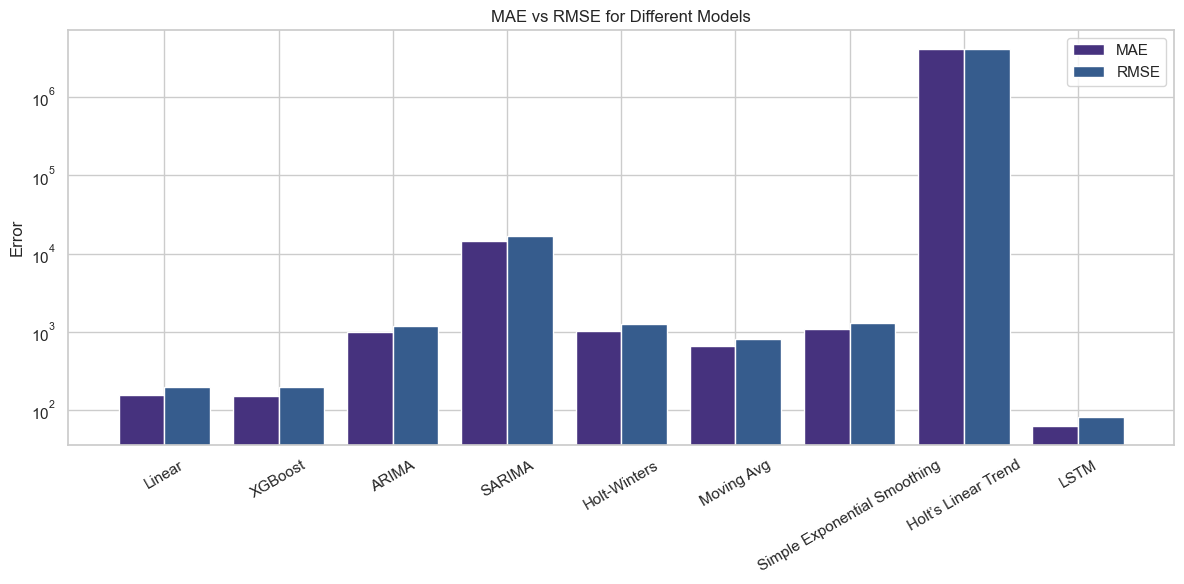

In [78]:
models = ['Linear', 'XGBoost', 'ARIMA', 'SARIMA', 'Holt-Winters', 'Moving Avg','Simple Exponential Smoothing', 'Holt’s Linear Trend', 'LSTM']
mae_scores = [lr_mae, xgb_mae, arima_mae, sarima_mae, hw_mae, ma_mae, ses_mae, holt_mae, lstm_mae]
rmse_scores = [lr_rmse, xgb_rmse, arima_rmse, sarima_rmse, hw_rmse, ma_rmse, ses_rmse, holt_mae, lstm_rmse]

x = range(len(models))

plt.figure(figsize=(12, 6))
plt.bar(x, mae_scores, width=0.4, label='MAE', align='center')
plt.bar([i + 0.4 for i in x], rmse_scores, width=0.4, label='RMSE', align='center')

plt.xticks([i + 0.2 for i in x], models, rotation=30)
plt.ylabel('Error')
plt.yscale('log')
plt.title('MAE vs RMSE for Different Models')
plt.legend()
plt.tight_layout()
plt.show()


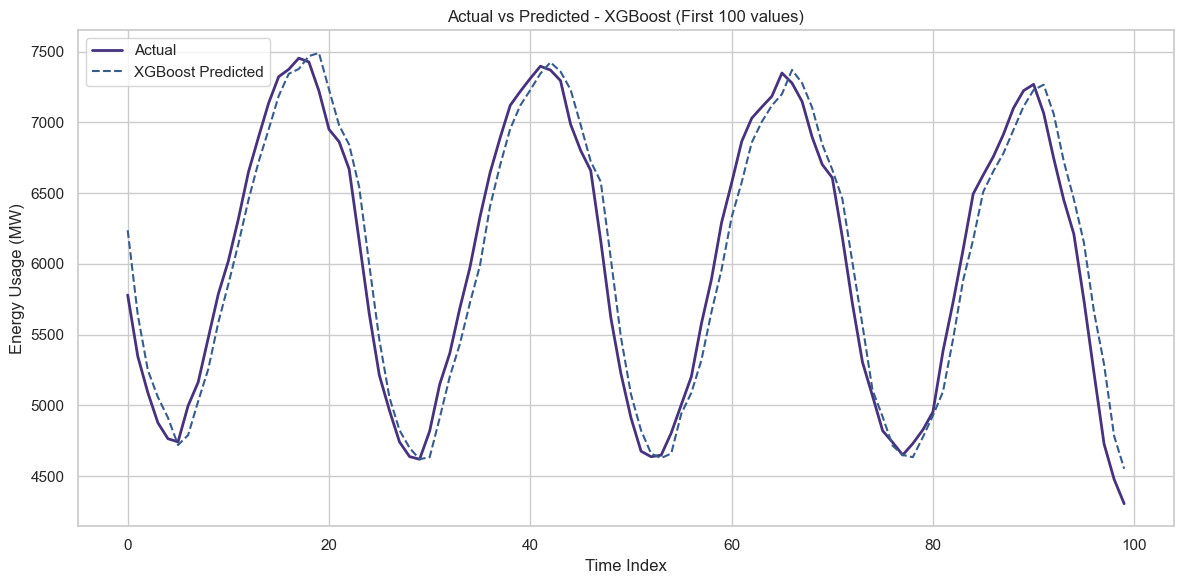

In [79]:
# Create DataFrame
comparison_df = pd.DataFrame({
    'Actual': y_test[:100],
    'Predicted': xgb_pred[:100]
})

# Plot
plt.figure(figsize=(12,6))
plt.plot(comparison_df['Actual'].values, label='Actual', linewidth=2)
plt.plot(comparison_df['Predicted'].values, label='XGBoost Predicted', linestyle='--')
plt.title("Actual vs Predicted - XGBoost (First 100 values)")
plt.xlabel("Time Index")
plt.ylabel("Energy Usage (MW)")
plt.legend()
plt.tight_layout()
plt.show()


In [80]:
lr_mae, xgb_mae, arima_mae, sarima_mae, hw_mae, ma_mae, ses_mae, holt_mae, lstm_mae

# Your model errors (update with exact values from your run)
model_results = {
    'Linear': {'MAE': lr_mae, 'RMSE': lr_rmse},
    'XGBoost': {'MAE': xgb_mae, 'RMSE': xgb_rmse},
    'ARIMA': {'MAE': arima_mae, 'RMSE': arima_rmse},
    'SARIMA': {'MAE': sarima_mae, 'RMSE': sarima_rmse},
    'Holt-Winters': {'MAE': hw_mae, 'RMSE': hw_rmse},
    'Moving Avg': {'MAE': ma_mae, 'RMSE': ma_rmse},
    'Simple Exponential Smoothing': {'MAE': ses_mae, 'RMSE': ses_rmse},
    'Holt\'s Linear Trend': {'MAE': holt_mae, 'RMSE': holt_rmse},
    'LSTM': {'MAE': lstm_mae, 'RMSE': lstm_rmse}
}

# Create DataFrame
results_df = pd.DataFrame(model_results).T.reset_index()
results_df.columns = ['Model', 'MAE', 'RMSE']

# Add ranking
results_df['MAE Rank'] = results_df['MAE'].rank(method='min')
results_df['RMSE Rank'] = results_df['RMSE'].rank(method='min')
results_df['Average Rank'] = results_df[['MAE Rank', 'RMSE Rank']].mean(axis=1)

# Identify best model
results_df['Best Model'] = results_df['Average Rank'] == results_df['Average Rank'].min()

# Sort by average rank
results_df = results_df.sort_values(by='Average Rank')

# Display
print(results_df)

                          Model           MAE          RMSE  MAE Rank  \
8                          LSTM  6.254173e+01  8.239349e+01       1.0   
1                       XGBoost  1.502387e+02  1.944095e+02       2.0   
0                        Linear  1.563240e+02  1.985939e+02       3.0   
5                    Moving Avg  6.568403e+02  8.202919e+02       4.0   
2                         ARIMA  1.000000e+03  1.185328e+03       5.0   
4                  Holt-Winters  1.034857e+03  1.255265e+03       6.0   
6  Simple Exponential Smoothing  1.086384e+03  1.277653e+03       7.0   
3                        SARIMA  1.465011e+04  1.667355e+04       8.0   
7           Holt's Linear Trend  4.090111e+06  4.723060e+06       9.0   

   RMSE Rank  Average Rank  Best Model  
8        1.0           1.0        True  
1        2.0           2.0       False  
0        3.0           3.0       False  
5        4.0           4.0       False  
2        5.0           5.0       False  
4        6.0           

In [81]:
print(f'Best Model : {results_df[results_df["Best Model"] == True]["Model"]}')

Best Model : 8    LSTM
Name: Model, dtype: object


# Forecasting for next 30 days

In [82]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)  # Force eager execution

last_sequence = np.array(df_lstm['Scaled'].values[-24:]).reshape(1, 24, 1).astype(np.float32)

def predict_step(model, input_seq):
    input_tensor = tf.convert_to_tensor(input_seq, dtype=tf.float32)
    return model(input_tensor, training=False).numpy()[0][0]

forecast_scaled = []

for _ in range(720):
    pred = predict_step(lstm_model, last_sequence)
    forecast_scaled.append(pred)

    # Slide the sequence
    new_input = np.append(last_sequence[0, 1:], [[pred]], axis=0)
    last_sequence = new_input.reshape(1, 24, 1).astype(np.float32)

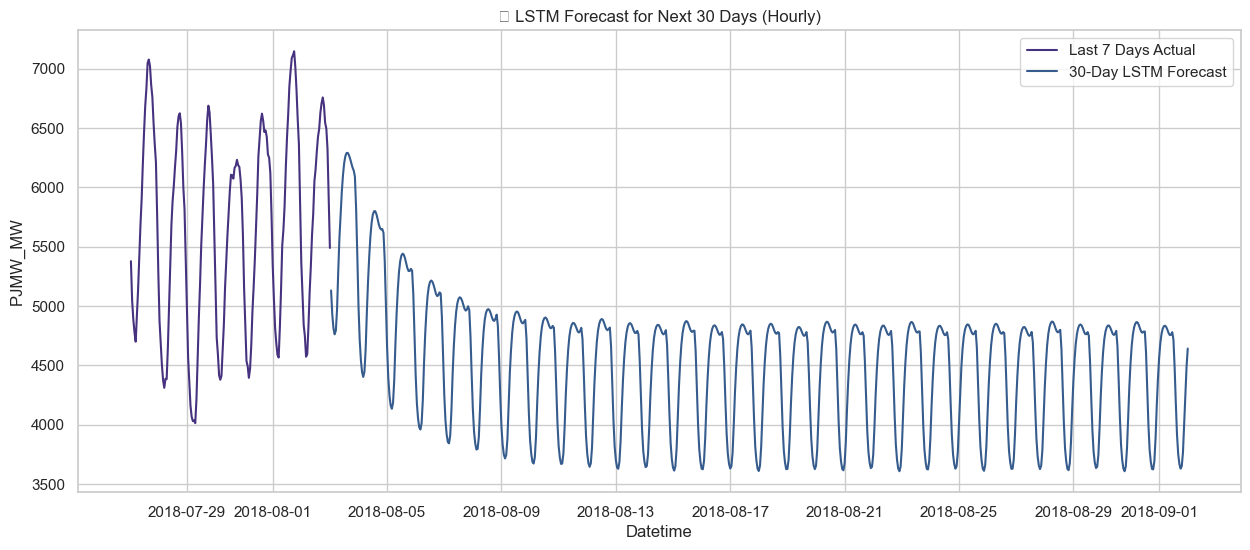

In [83]:
forecast_values = scaler_lstm.inverse_transform(np.array(forecast_scaled).reshape(-1, 1))
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(hours=1), periods=720, freq='H')

forecast_df = pd.DataFrame({'Forecast_MW': forecast_values.flatten()}, index=forecast_index)

plt.figure(figsize=(15, 6))
plt.plot(df['PJMW_MW'].iloc[-168:], label='Last 7 Days Actual')
plt.plot(forecast_df['Forecast_MW'], label='30-Day LSTM Forecast')
plt.title("🔮 LSTM Forecast for Next 30 Days (Hourly)")
plt.xlabel("Datetime")
plt.ylabel("PJMW_MW")
plt.legend()
plt.grid(True)
plt.show()

In [84]:
lstm_model.save('model.h5')  # Creates a model.h5 file